In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv("data/redteam.txt")

G = nx.from_pandas_edgelist(df, 'src', 'dst')

### Exercise 1

Can you write a single line of code that returns the number of nodes in the graph?

In [2]:
len(G.nodes())

305

### Exercise 2

Can you write a single line of code that returns the number of relationships represented?

In [3]:
len(G.edges())

308

#### Exercise 3

Can you create a ranked list of the importance of each individual, based on the number of neighbors they have? (3 min.)

Hint: One suggested output would be a list of tuples, where the first element in each tuple is the node ID (an integer number), and the second element is the number of neighbors that it has.

Hint: Python's sorted(iterable, key=lambda x:...., reverse=True) function may be of help here.

In [4]:
# Possible Answers:
sorted(G.nodes(), 
       key=lambda x:len(list(G.neighbors(x))), reverse=True)[0:5]
# sorted([(n, G.neighbors(n)) for n in G.nodes()], 
#        key=lambda x: len(x[1]), reverse=True)[0:5]

['C17693', 'C19932', 'C457', 'C22409', 'C529']

### Exercise 4

Text(0, 0.5, 'PR')

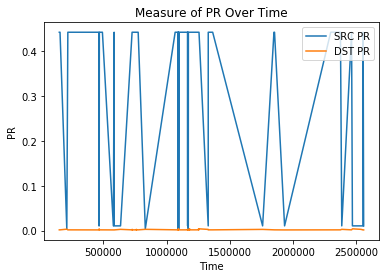

In [5]:
evol = nx.pagerank(G)
def pr(node):
    for key, value in evol.items():
        if key == node:
            return value
            
df['src_pr'] = df['src'].apply(pr)
df['dst_pr'] = df['dst'].apply(pr)

src = df['src_pr']
dst = df['dst_pr']
tm = df['time']
plt.plot(tm, src)
plt.plot(tm, dst)
plt.legend(['SRC PR', 'DST PR'], loc='upper right')
plt.title('Measure of PR Over Time')
plt.xlabel('Time')
plt.ylabel('PR')